## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# setting the seed to assure I receive the same answers on quizzes as others
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# load and view first few rows of dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# find the number of rows in the dataset
df.shape

(294478, 5)

There are 294,478 rows and 5 columns in the dataset. 

c. The number of unique users in the dataset.

In [4]:
# how many unique users are in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# users conveted
df.query('converted == "1"').user_id.nunique()

35173

In [6]:
# proportion of users converted
df.query('converted == "1"').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# number of times the new_page and treatment don't line up (referred to https://pandas.pydata.org/pandas-docs/stable/indexing.html)
df.query('(landing_page == "new_page" and group != "treatment") or (landing_page != "new_page" and group == "treatment")').user_id.count()

3893

f. Do any of the rows have missing values?

In [8]:
# see if rows have missing(null) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no rows with null values.  All 294,478 rows have non-null values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# drop the rows as specified in Quiz 2, since we should only use the rows that we can feel confident in the accuracy of the data
# referred to combination of https://pandas.pydata.org/pandas-docs/stable/indexing.html 
# and https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression?rq=1
df2 = df.drop(df.query('(landing_page == "new_page" and group != "treatment") or (landing_page != "new_page" and group == "treatment") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [10]:
# double check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# of unique user_ids in df2
df2.user_id.nunique()

290584

In [12]:
# how many rows there are in df2
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# user id that is repeated
# referred to https://stackoverflow.com/questions/15247628/how-to-find-duplicate-names-using-pandas
user_ids = df2.user_id.value_counts()
user_ids[user_ids > 1]

773192    2
Name: user_id, dtype: int64

The user_id repeated in df2 is 773192. 

c. What is the row information for the repeat **user_id**? 

In [14]:
# find the row information for the repeat user_id
df2.loc[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# removing one of the rows with a duplicate user_id
df2.drop(index=2893, inplace=True)

In [16]:
# confirm that one of the rows with a duplicate user_id was removed
df2.loc[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` I'm using **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# probability that an individual converted regardless of the page they receive
df2.converted.mean()

0.11959708724499628

There is a 12% probability that an individual converted regardless of the page they receive. 

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# probability that an individual in the control group converted
control_converted = df2[df2['group'] == 'control'].converted.mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# probability that an individual in the treatment group converted
treatment_converted = df2[df2['group'] == 'treatment'].converted.mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# count of the individual users who received the new page
rec_new_page = df2[df2['landing_page'] == 'new_page'].user_id.count()
rec_new_page

145310

In [21]:
# probability that an individual receives the new page
rec_new_page/df2.shape[0]

0.5000619442226688

There is an approximate 50% probability that an individual receives the new page.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probability of converting regardless of whether it's a new or old web page is 11.96%. Given an individual user received the control (or old web page), the probability of converting is 12.04%. Given that an indivudal user received the treatment (or new web page), the probability of converting is 11.88%, and the probability of any individual user receiving the new page is 50.01%.  Seeing that there is approximately a 12% chance of converting whether the control or treatment were given, also that the difference in the number of individuals in each group is distributed relatively evenly, and that the convert probability of individual users who received the treatment is even slightly lower (~.15% to .16%) than those in the control group, there is no sufficient evidence to say that the new treatment page leads to an increase in conversions at this point in the analysis.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.




Null Hypothesis: The new web page generates a convert rate that is equal to or less than the old web page.

or $H_{0}$:  $p_{new}$  -  $p_{old}$ $≤$ $0$


Alternate Hypothesis: The new web page generates a convert rate that is greater than the old web page.

or $H_{1}$:  $p_{new}$  -  $p_{old}$ $>$ $0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# convert rate for the new web page under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# convert rate for the old web page under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
# number of individual users who received the new web page
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()
n_new

145310

d. What is $n_{old}$?

In [25]:
# number of individual users who received the old web page
n_old = df2[df2['landing_page'] == 'old_page'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# simulate the number of transactions equal to the individual users who received the new web page
# with a convert rate under the null and store the values in an array called new_page_converted 
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted

array([0, 1, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# simulate the number of transactions equal to the individual users who received the old web page
# with a convert rate under the null and store the values in an array called new_page_converted 
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_new), p_new])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# find the convert rate difference between the new and old web pages for the simulated values under the null
new_page_converted.mean() - old_page_converted.mean()

-0.0002706879027900705

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# simulate 10,000 iterations of the convert rate differences between the new and old web pages for the simulated values under the null
# the iteration is so we can get close to a simulation close to the population and have a very large distribution of values  
p_diffs = []
for i in range(10000): 
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_new), p_new])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [30]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

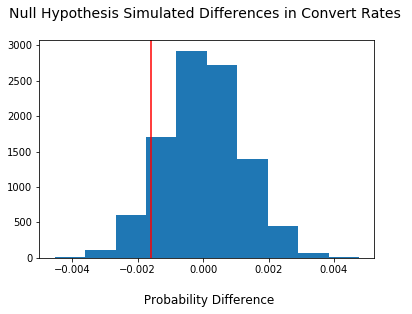

In [31]:
# plot a histogram of the p_diffs + include a red line to identify the observed difference
plt.hist(p_diffs);
plt.title("Null Hypothesis Simulated Differences in Convert Rates \n", fontsize=14)
plt.xlabel("\n Probability Difference", fontsize=12)
plt.axvline(treatment_converted - control_converted, color='r');

My suspicion was that the plotted histogram would generate a normal distribution from the multiple values and it did. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# find p-value
obs_diff = treatment_converted - control_converted
(p_diffs > obs_diff).mean()

0.9066

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed the proportion of values from our null distribution that are greater than the observed mean.  The value is called the p-value and its definition is the probability of observing your statistic or a "more extreme" value (more in favor of the alternate hypothesis mean) if the null hypothesis is true. Small p-values or less than the alpha (type I error) value suggests that we have evidence reject the null and favor the alternate, that the new web page generates a convert rate that is greater than the old web page. When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis and do not have evidence to reject the null, that the new web page generates a convert rate that is equal to or less than the old web page. The p-value is quite large at 0.9066 and this provides reasoning that it is likely that our statistic is from the null, and therefore we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

# calculate the number of conversions for each page
# as well as the number of individuals who received each page

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['landing_page'] == 'old_page'].user_id.count()
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
# using stats.proportions_ztest to compute test statistic and p-value.
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger' )
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value computed in the previous question ~ 0.9 is virtually the same to our p-value generated from the manual computation. The z-value of -1.31 provides additional evidence that our statistic is from the null and therefore fail to reject the null hypothesis, that the new web page generates a conversion rate that is equal to or less than the old web page. If the z-value were to be either greater than the critical value of 1.96 or less than -1.96, then the value of the test statistic would have been significant and then the new web page would have generated an increased conversion rate.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The type of regression to be used in this case would be logistic regression, since it is an approach that is used to only predict two possible categorical outcomes.It is bound to a probability between 0 and 1.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
# create a column for the intercept
df2['intercept'] = 1

# create a dummy variable column for which page each user received
df2[['no_ab_page','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(['no_ab_page'], axis=1)

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# instantiate the model
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

# fit the model using the two columns created previously to predict whether or not an individual converts
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
# provide summary of model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        06:45:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [39]:
# in order to interpret, need to exponentiate...easier to explain negative coefficient with reciprocal
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with the ab_page in this regression analysis is 0.19 in comparison to the p-value of 0.905 for the Part II A/B Test. The null hypothesis in this logistic regression approach reflects that there is no difference between the control and the treatment. The alternate hypothesis simply states that there is simply a difference between the control (old web page) and the treatment (new web page) - a two tailed test, which is different than the A/B Test hypothesis. In the A/B test, the null assumes that the treatment(new web page) generates a convert rate that is equal to or less than the control (old web page) and the alternate assumes that the treatment generates a convert rate that is greater than the control (old web page) - a one tailed test.** 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In considering additional factors for inclusion into your regression model, you could potentially improve the model's predictability, R-squared value, or discover valuable insights that might not have otherwise been discovered. For instance, an individual's country of origin, age, health, occupation, or income may contribute to the influence of conversion as opposed to only the web page. On the contrary, there are also potential risks that could occur by adding these additional factors or variables into the regression model.  One example includes multicollinearity, which occurs when independent variables in a regression model are correlated. If the degree of correlation is high enough, it can cause problems when you attempt to fit the model or when you interpret the regression model's results, in turn weakening the statistical power of your model. You can also overfit a model with too many variables as the the coefficients, p-values, and R-squared can be misleading. It could be too complicated for your data set and adjusting to random noise of your sample as opposed to representing the population correctly.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# read in the countries.csv dataset merge together your datasets on the approporiate rows
countries_df = pd.read_csv('./countries.csv')

# merge together the datasets on the approporiate rows
df2_cntry = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df2_cntry.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
# identify the unique values of country and their counts
df2_cntry.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
# confirm that there are no null values in the dataset
df2_cntry.isnull().sum()

country         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
dtype: int64

In [43]:
# create dummy variable column
df2_cntry[['CA', 'UK', 'US']] = pd.get_dummies(df2_cntry['country'])
df2_cntry = df2_cntry.drop(['country', 'CA'], axis=1)
df2_cntry.head()

,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [44]:
# instantiate the model
logit_mod_cntry = sm.Logit(df2_cntry['converted'], df2_cntry[['intercept', 'UK', 'US']])

# fit the model 
results = logit_mod_cntry.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [45]:
# provide summary of model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               1.521e-05
Time:                        06:45:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [46]:
# to interpret, need to exponentiate
np.exp(0.0507), np.exp(0.0408)

(1.052007243765014, 1.0416437559600236)

The country had no impact on conversion. The p-values for the countries are above a 0.05 $\alpha$ level. We fail to reject the null and conclude that there is no significant contribution from country in regards to the conversion rates between the old and new pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
df2_cntry['US_page'] = df2_cntry['US'] * df2_cntry['ab_page']
df2_cntry['UK_page'] = df2_cntry['UK'] * df2_cntry['ab_page']
df2_cntry.head()

,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,US_page,UK_page
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1


In [48]:
# instantiate the model
logit_mod = sm.Logit(df2_cntry['converted'], df2_cntry[['intercept', 'ab_page', 'US', 'UK', 'US_page', 'UK_page']])

# fit the model using the two columns created previously to predict whether or not an individual converts
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [49]:
# provide summary of model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Sep 2018   Pseudo R-squ.:               3.482e-05
Time:                        06:45:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [50]:
# to interpret, need to exponentiate...use reciprocal to explain any negative coefficients easily
1/np.exp(-0.0674), np.exp(0.0175), np.exp(0.0118), np.exp(0.0469), np.exp(0.0783)

(1.0697232819209153,
 1.0176540221507617,
 1.011869894648401,
 1.048017202119183,
 1.0814470441230692)

**Interaction between page and country also do not generate statistically significant effects. Therefore, we fail to reject the null as there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict that there is a difference in user conversion.**

**In all three tests, whether it's the manual test based on probability, the A/B test, or regression analysis, there is no evidence to reject the null and go with the alternate.  One recommendation is for the company to replace the new web page and rigorously work on another to help improve the rate of converting individuals to purchase their product.**